In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import networkx as nx

In [17]:
# Load the data
connectome = pd.read_csv('../../datasets/CElegansTP/data/Connectome.csv', index_col=0)
neurons_to_muscles = pd.read_csv('../../datasets/CElegansTP/data/Neurons_to_Muscles.csv', index_col=0)
sensory = pd.read_csv('../../datasets/CElegansTP/data/Sensory.csv', index_col=0)
spatial_positions = pd.read_csv('../../datasets/CElegansTP/data/spatialpositions/distances.csv', index_col=0)

In [19]:
spatial_positions

,0,1,2
ADAL,8.650,-322.629100,-1.089988
ADAR,-12.900,-322.629100,-1.089988
ADEL,11.000,-326.040100,-0.886702
ADER,-15.300,-326.040100,-0.886702
ADFL,3.725,-353.099500,1.670831
...,...,...,...
VD5,-0.750,-134.725000,21.439050
VD6,-0.700,-74.909040,27.795820
VD7,-12.350,-5.144012,21.984110
VD8,-0.750,87.203490,24.844880


In [37]:
# Create a directed graph based on connectome data
G = nx.DiGraph()
for i, row in connectome.iterrows():
    neuron = row['Neuron']
    target = row['Target']
    weight = row['Number of Connections']
    G.add_edge(neuron, target, weight=weight)

for node in G.nodes():
    G.nodes[node]['pos'] = (spatial_positions.loc[node][0], spatial_positions.loc[node][2])


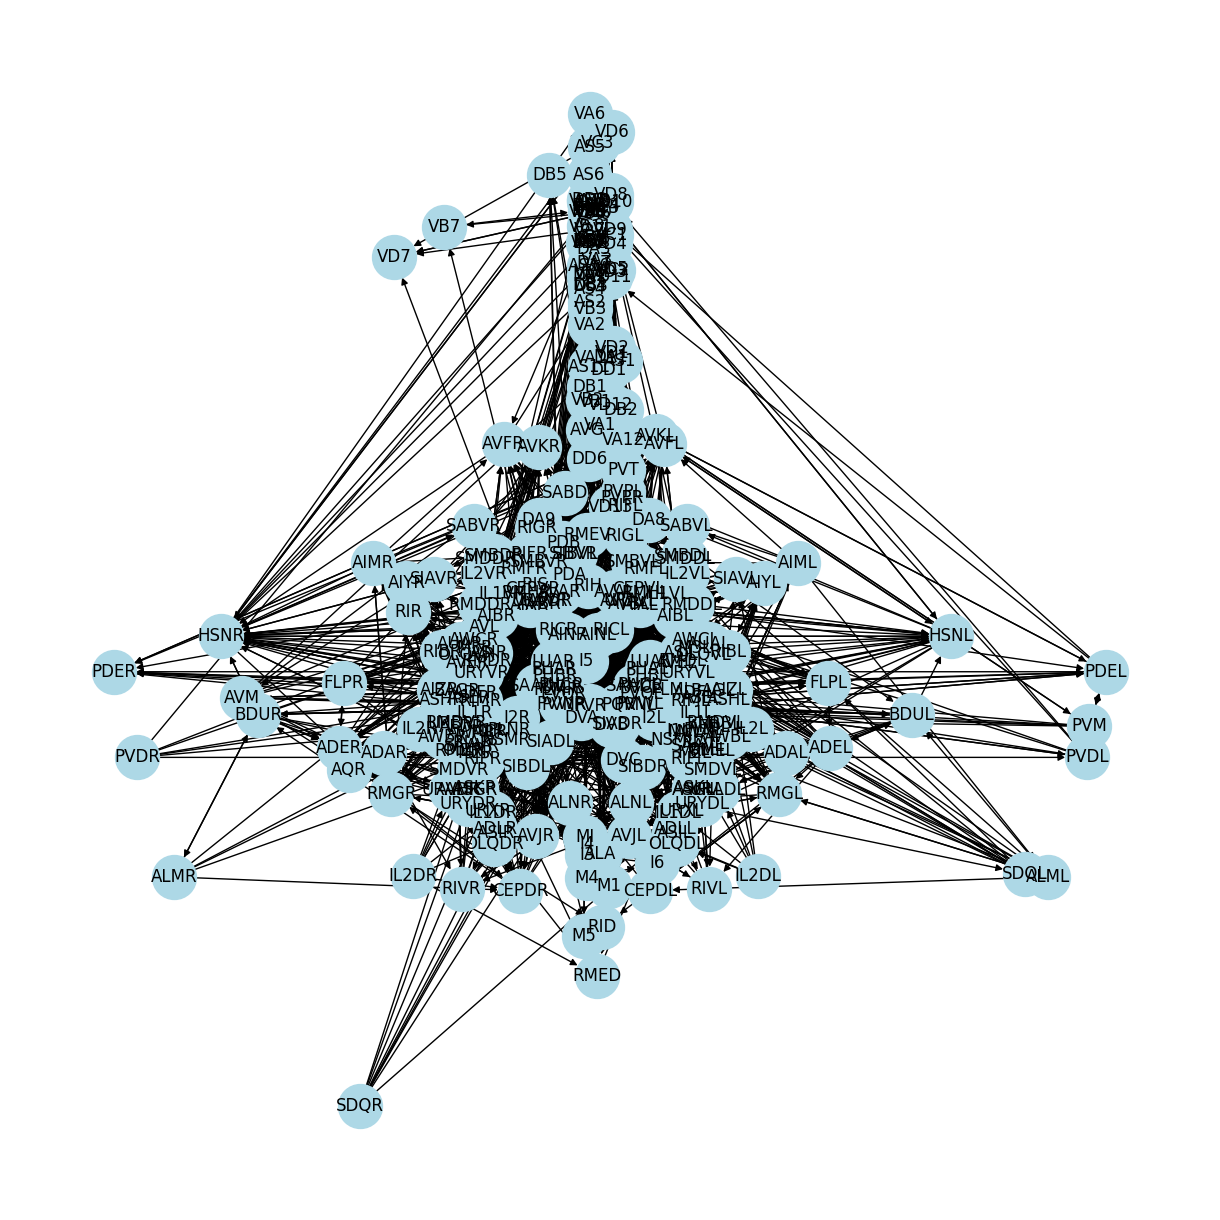

In [38]:
# display the graph
plt.figure(figsize=(12, 12))
pos = nx.get_node_attributes(G,'pos')
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue')
plt.show()